# A/B Hypothesis Testing 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np



In [14]:
#
import os
print(os.getcwd())


c:\Users\Hp\Videos\week3\notebooks


In [1]:
import sys
sys.path.append(r"C:\Users\Hp\Videos\week3")

from scripts.ab_hypothesis_testing import ABHypothesisTesting



In [11]:
import os
import sys

# Ensure the correct working directory
os.chdir(r"C:\Users\Hp\Videos\week3")
print("Working directory:", os.getcwd())

# Append the project path to system path
sys.path.append(r"C:\Users\Hp\Videos\week3")
print("System path:", sys.path)


Working directory: C:\Users\Hp\Videos\week3
System path: ['C:\\ProgramData\\miniconda3\\python312.zip', 'C:\\ProgramData\\miniconda3\\DLLs', 'C:\\ProgramData\\miniconda3\\Lib', 'C:\\ProgramData\\miniconda3', 'c:\\Users\\Hp\\Videos\\week3\\venv', '', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages\\win32', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Hp\\Videos\\week3\\venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\Hp\\Videos\\week3', 'C:\\Users\\Hp\\Videos\\week3']


In [2]:
from scripts.ab_hypothesis_testing import ABHypothesisTesting

In [6]:
import pandas as pd
df = pd.read_csv('../data/insurance_data.csv')



In [7]:
# Initialize the hypothesis testing class
hypothesis_testing = ABHypothesisTesting(df)


In [6]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.info())


Unnamed: 0     0
Province       0
Zipcode        0
Gender         0
Total_Claim    0
Premium        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Province     1000 non-null   object 
 2   Zipcode      1000 non-null   int64  
 3   Gender       1000 non-null   object 
 4   Total_Claim  1000 non-null   float64
 5   Premium      1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB
None


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())


  Province  Zipcode  Gender  Total_Claim      Premium
0        C     1003  Female   652.740226   898.493109
1        A     1003  Female  1159.389368  1040.563548
2        C     1003    Male   729.641413  1137.593249
3        C     1003  Female   253.524198   764.332164
4        A     1001    Male   938.056933  1349.828367


## Risk Differences Across Provinces

### Analysis Objective
This test examines whether there are significant differences in **risk levels** (measured by `Total Claims`) across provinces. The goal is to understand how risk varies regionally, which can inform province-specific policies or risk management strategies.

### Hypotheses
- **Null Hypothesis (H₀):** No risk differences across provinces.
- **Alternative Hypothesis (H₁):** Risk differences exist across provinces.

In [9]:
# Test if there are risk differences across provinces
province_test_result = hypothesis_testing.test_risk_across_provinces()
province_test_result


{'Test': 'ANOVA',
 'Null Hypothesis': 'No risk differences across provinces',
 'F-Statistic': np.float64(8.626482565483611),
 'p-Value': np.float64(0.0001930246778774567),
 'Reject Null': np.True_}


### Results
- **Test Type:** ANOVA (Analysis of Variance)
  - Compares the mean `Total Claims` across multiple provinces.
- **F-Statistic:** 8.626
  - Indicates that the variance in `Total Claims` between provinces is significantly greater than the variance within provinces.
- **p-Value:** 0.000193
  - This value is much smaller than the common significance level of 0.05, suggesting the observed differences are highly unlikely to be due to random chance.
- **Decision:** Reject the null hypothesis (H₀).

### Conclusion
There is strong evidence to conclude that **significant risk differences exist across provinces**.

### Implications
1. **Risk Management:** Provinces with higher average claims may require stricter risk mitigation measures, while lower-risk provinces could benefit from premium reductions.
2. **Pricing Strategy:** Develop province-specific premium structures to reflect the risk profile of each province.
3. **Further Analysis:** Investigate the factors contributing to risk differences, such as demographic, geographic, or economic factors.



## Risk Differences Between Zip Codes

### Analysis Objective
This test examines whether there are significant differences in **risk levels** (measured by `Total Claims`) between zip codes. The goal is to evaluate how risk varies geographically at a finer level, providing insights for localized strategies.

### Hypotheses
- **Null Hypothesis (H₀):** No risk differences between zip codes.
- **Alternative Hypothesis (H₁):** Risk differences exist between zip codes.

In [8]:
# Test if there are risk differences between zip codes
zipcode_test_result = hypothesis_testing.test_risk_between_zipcodes()
zipcode_test_result


{'Test': 'ANOVA',
 'Null Hypothesis': 'No risk differences between zip codes',
 'F-Statistic': 1.6365345978982229,
 'p-Value': 0.1951758838795849,
 'Reject Null': False}

### Results
- **Test Type:** ANOVA (Analysis of Variance)
  - Compares the mean `Total Claims` across multiple zip codes.
- **F-Statistic:** 1.637
  - Suggests a relatively low variance in `Total Claims` between zip codes compared to within zip codes.
- **p-Value:** 0.195
  - This value is greater than the common significance level of 0.05, indicating that the observed differences are likely due to random chance.
- **Decision:** Fail to reject the null hypothesis (H₀).

### Conclusion
There is **insufficient evidence** to conclude that significant risk differences exist between zip codes. Any observed differences in `Total Claims` are likely due to random variation.

### Implications
1. **Uniform Risk Strategy:** Since risk levels appear consistent across zip codes, there may be no need for differentiated risk management or pricing strategies based on zip codes.
2. **Further Exploration:** Investigate other variables (e.g., demographics, policy types) that may reveal meaningful differences between zip codes.
3. **Combination Analysis:** Consider analyzing zip code risk differences alongside other factors, such as region or gender, for a more comprehensive understanding.

### Next Steps
- Visualize `Total Claims` by zip code to confirm the absence of meaningful trends.
- Conduct subgroup analyses (e.g., zip code and gender combinations) to uncover any hidden patterns.


## Margin Differences Between Zip Codes

### Analysis Objective
This test examines whether **profit margins** (calculated as `Premium - Total Claims`) differ significantly across zip codes. Profit margin reflects the profitability of policies in each zip code, making this analysis critical for identifying underperforming or highly profitable areas.

### Key Difference from Risk Differences Test
- **Test Risk Between Zip Codes:**
  - Focuses on analyzing **Total Claims** to determine if there are significant risk differences between zip codes.
  - Guides **risk management** strategies by identifying regions with higher or lower claims.
- **Test Margin Differences Between Zip Codes:**
  - Focuses on analyzing **Profit Margins** (`Premium - Total Claims`) to determine if there are significant profitability differences between zip codes.
  - Guides **pricing and profitability optimization** by highlighting regions that are overperforming or underperforming.

### Hypotheses
- **Null Hypothesis (H₀):** No significant margin differences between zip codes.
- **Alternative Hypothesis (H₁):** Significant margin differences exist between zip codes.

In [9]:
# Test if there are significant margin differences between zip codes
margin_test_result = hypothesis_testing.test_margin_difference_between_zipcodes()
margin_test_result


{'Test': 'ANOVA',
 'Null Hypothesis': 'No significant margin differences between zip codes',
 'F-Statistic': 14.131693475190742,
 'p-Value': 8.872893794662912e-07,
 'Reject Null': True}

### Results
- **F-Statistic:** 14.132
  - Indicates a large variance in profit margins across zip codes compared to within-group variance.
- **p-Value:** 8.87e-07
  - This value is far below the common significance level of 0.05, indicating that the observed differences are highly unlikely to be due to random chance.
- **Decision:** Reject the null hypothesis (H₀).

### Conclusion
There is strong evidence to conclude that **significant profit margin differences exist between zip codes**.

### Implications
1. **Profit Optimization:** Tailor strategies to specific zip codes based on their profitability. For example:
   - Focus on enhancing profitability in underperforming zip codes.
   - Sustain or expand in highly profitable zip codes.
2. **Pricing Adjustments:** Evaluate zip codes with lower profit margins and consider revising premiums or reducing costs.
3. **Further Exploration:** Investigate factors driving these differences, such as demographics, policy mix, or claim frequency.



## Interpretation: Risk Differences Between Genders

### Analysis Objective
This test examines whether there are significant differences in **risk levels** (measured by `Total Claims`) between genders. Understanding risk differences by gender can help insurers design gender-specific policies or adjust premiums based on claims data.

### Hypotheses
- **Null Hypothesis (H₀):** No significant risk differences between women and men.
- **Alternative Hypothesis (H₁):** Significant risk differences exist between women and men.

In [10]:
# Test if there are significant risk differences between genders
gender_test_result = hypothesis_testing.test_risk_difference_gender()
gender_test_result


In [8]:
{'Test': 'T-Test',
 'Null Hypothesis': 'No significant risk differences between women and men',
 'T-Statistic': 3.5693545588418787,
 'p-Value': 0.00037512158401762627,
 'Reject Null': True}

{'Test': 'T-Test',
 'Null Hypothesis': 'No significant risk differences between women and men',
 'T-Statistic': 3.5693545588418787,
 'p-Value': 0.00037512158401762627,
 'Reject Null': True}

### Results
- **Test Type:** T-Test (Independent Samples)
  - Compares the mean `Total Claims` between two independent groups: women and men.
- **T-Statistic:** 3.569
  - Indicates the magnitude of the difference between the means relative to the variability within groups.
- **p-Value:** 0.000375
  - This value is much smaller than the common significance level of 0.05, suggesting that the observed differences are highly unlikely to be due to random chance.
- **Decision:** Reject the null hypothesis (H₀).

### Conclusion
There is strong evidence to conclude that **significant risk differences exist between women and men**.

### Implications
1. **Gender-Specific Strategies:**
   - If men or women exhibit consistently higher claims, tailor policies, premiums, or risk mitigation strategies accordingly.
2. **Premium Adjustments:**
   - For the gender with lower average claims, consider offering reduced premiums to attract more clients.
3. **Further Analysis:**
   - Investigate underlying factors contributing to the differences, such as claim frequency, type of coverage, or demographic influences.


In [14]:
import pandas as pd
data = pd.read_csv('../data/insurance_data.csv')



In [15]:
from scipy.stats import ttest_ind

# Gender-based segmentation
group_male = data[data['Gender'] == 'Male']['Total_Claim']
group_female = data[data['Gender'] == 'Female']['Total_Claim']





# Perform T-Test
t_stat, p_value = ttest_ind(group_male, group_female, equal_var=False)  # Use equal_var=False for unequal sample sizes

# Output results
print("T-Statistic:", t_stat)
print("p-Value:", p_value)

# Decision
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (Significant differences exist).")
else:
    print("Conclusion: Fail to reject the null hypothesis (No significant differences).")


T-Statistic: 3.5693545588418787
p-Value: 0.00037512158401762627
Conclusion: Reject the null hypothesis (Significant differences exist).


## Hypothesis Testing Summary

The following table summarizes the results of the hypotheses tested for risk differences, margins, and gender-based analysis:

| Hypothesis                                | Test Type | p-Value     | Decision (Reject/Fail to Reject H₀) | Key Takeaway                     |
|-------------------------------------------|-----------|-------------|------------------------------------|-----------------------------------|
| Risk differences across provinces         | ANOVA     | 0.000193    | Reject                             | Significant differences exist     |
| Risk differences between zip codes        | ANOVA     | 0.195       | Fail to Reject                     | No significant differences found  |
| Margin differences between zip codes      | ANOVA     | 8.87e-07    | Reject                             | Significant differences exist     |
| Risk differences between genders          | T-Test    | 0.000375    | Reject                             | Significant differences between males and females |

### Conclusion

- **Risk Differences Across Provinces**: There are significant risk differences across provinces, as confirmed by the ANOVA test.
- **Risk Differences Between Zip Codes**: No significant risk differences between zip codes were found.
- **Margin Differences Between Zip Codes**: Significant margin differences exist between zip codes, suggesting possible pricing adjustments.
- **Gender-Based Risk Differences**: There are significant differences in total claims between males and females.



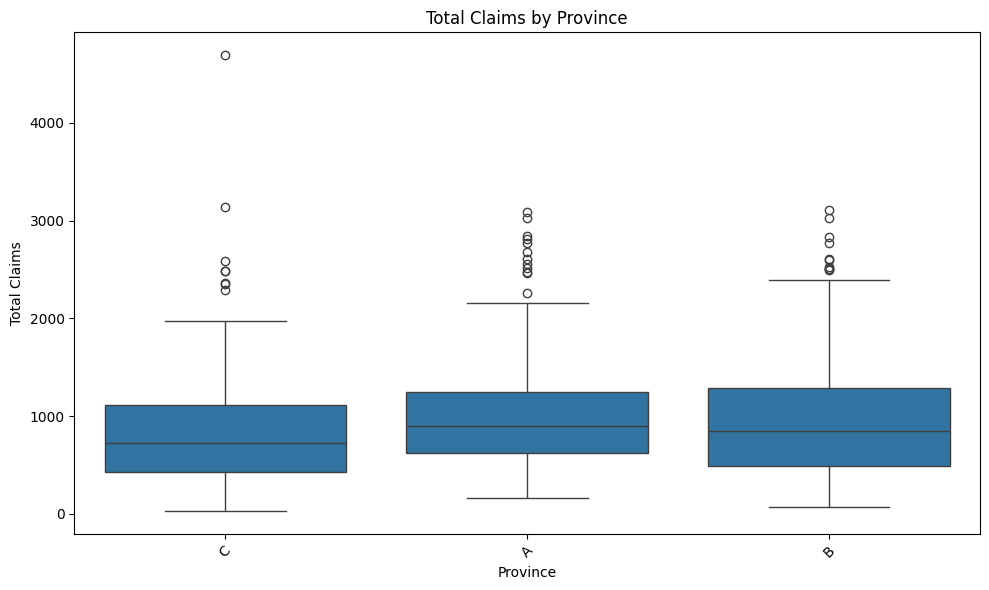

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Total Claims by Province
plt.figure(figsize=(10, 6))
sns.boxplot(x='Province', y='Total_Claim', data=data)
plt.title('Total Claims by Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


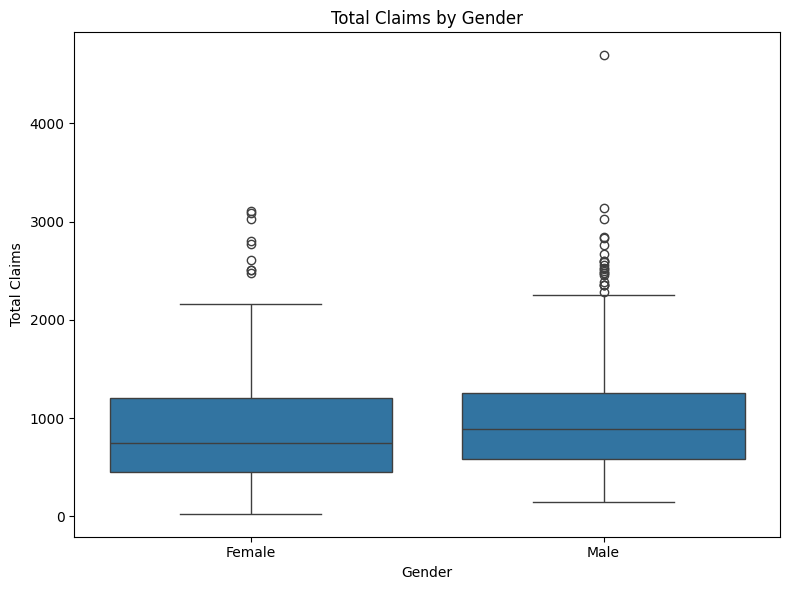

In [17]:
# Boxplot for Total Claims by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total_Claim', data=data)
plt.title('Total Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claims')
plt.tight_layout()
plt.show()


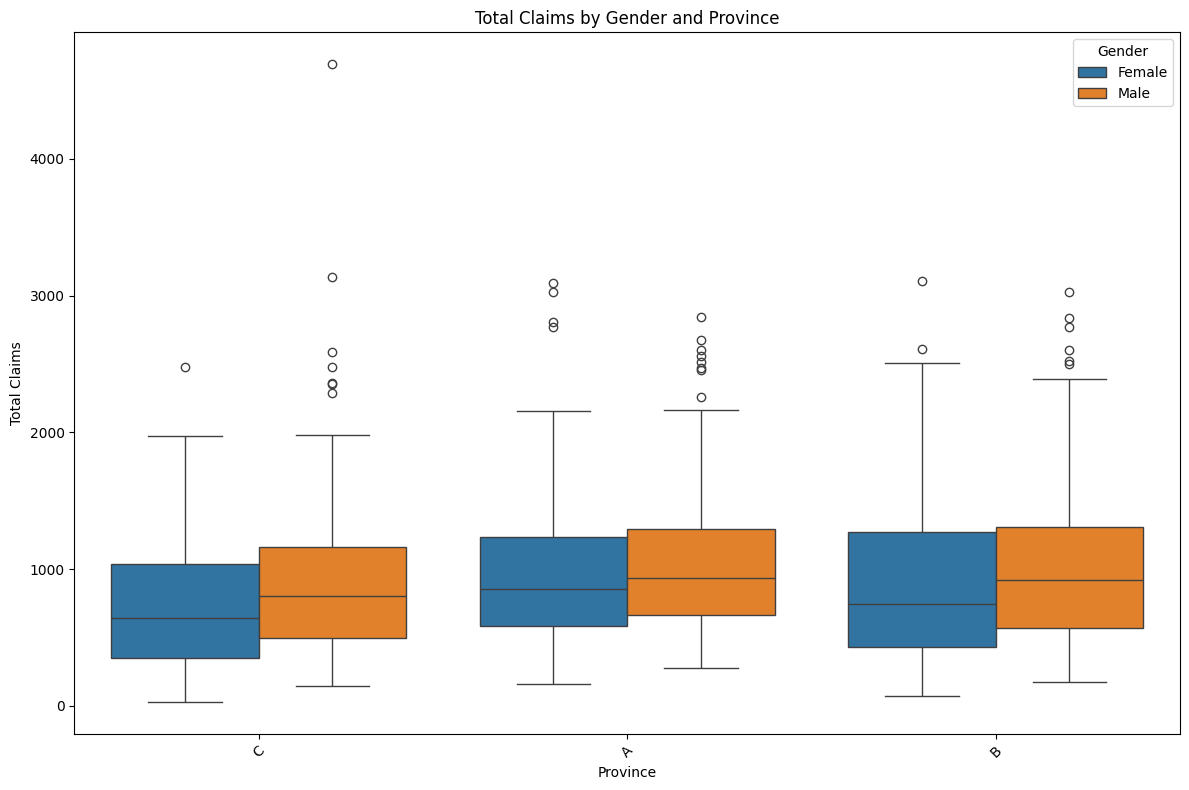

In [ ]:
# Boxplot for Total Claims by Gender and Province
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province', y='Total_Claim', hue='Gender', data=data)
plt.title('Total Claims by Gender and Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conclusion

Based on the hypothesis testing, we can draw the following conclusions:

1. **Risk Differences Across Provinces**: Significant differences were observed in total claims across provinces. Provinces with higher claims may need more robust risk management strategies, while others might benefit from premium adjustments.
   
2. **Risk Differences Between Zip Codes**: There is no significant difference in total claims across zip codes, suggesting that zip code-based differentiation may not be necessary for risk management.
   
3. **Margin Differences Between Zip Codes**: Significant margin differences across zip codes were found. This could imply that some areas are more profitable than others, and pricing or risk strategies could be adjusted accordingly.
   
4. **Gender-Based Risk Differences**: A significant difference was found in total claims between males and females. This indicates that gender may influence risk levels and should be considered when developing pricing models or risk management strategies.
   
### Recommendations

- **For Provinces**: Consider province-specific pricing and risk management strategies based on the observed risk differences.
- **For Zip Codes**: Given the lack of significant differences in risk, a uniform approach across zip codes might be more effective.
- **For Gender**: Gender-based risk differences suggest a need for gender-specific pricing models or coverage options.


In [19]:
# Assuming `data` has been defined and the profit margin is `Premium - Total_Claim`
data['Profit_Margin'] = data['Premium'] - data['Total_Claim']

# Split the data into low and high profit margin zip codes
low_margin = data[data['Profit_Margin'] <= data['Profit_Margin'].median()]
high_margin = data[data['Profit_Margin'] > data['Profit_Margin'].median()]

# Perform ANOVA (one-way)
from scipy.stats import f_oneway

low_margin_values = low_margin['Profit_Margin']
high_margin_values = high_margin['Profit_Margin']

f_stat, p_value = f_oneway(low_margin_values, high_margin_values)

# Output results
print("F-Statistic:", f_stat)
print("p-Value:", p_value)

# Decision
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (Significant margin differences between zip codes).")
else:
    print("Conclusion: Fail to reject the null hypothesis (No significant margin differences).")


F-Statistic: 1398.6275026261258
p-Value: 4.617183601581546e-192
Conclusion: Reject the null hypothesis (Significant margin differences between zip codes).


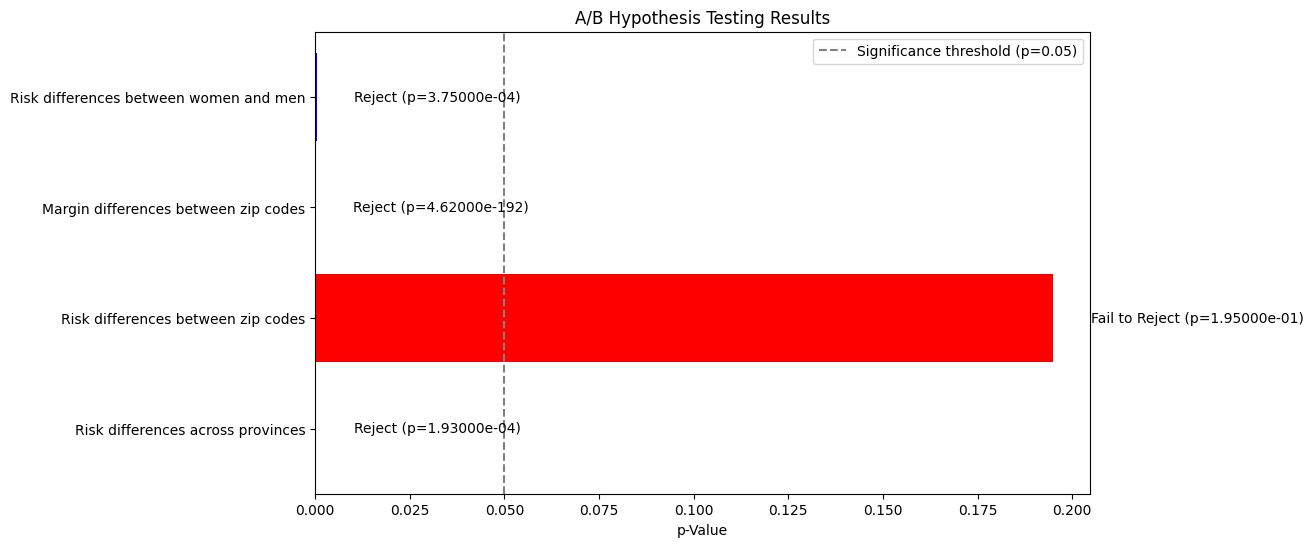

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
hypotheses = [
    "Risk differences across provinces", 
    "Risk differences between zip codes", 
    "Margin differences between zip codes", 
    "Risk differences between women and men"
]

p_values = [0.000193, 0.195, 4.62e-192, 0.000375]
decisions = ["Reject", "Fail to Reject", "Reject", "Reject"]

# Color map: Blue for Reject, Red for Fail to Reject
colors = ['blue' if decision == "Reject" else 'red' for decision in decisions]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(hypotheses, p_values, color=colors)

# Add labels
for i, (p_val, decision) in enumerate(zip(p_values, decisions)):
    plt.text(p_val + 0.01, i, f'{decision} (p={p_val:.5e})', va='center')

plt.xlabel('p-Value')
plt.title('A/B Hypothesis Testing Results')
plt.axvline(x=0.05, color='gray', linestyle='--', label='Significance threshold (p=0.05)')
plt.legend()

# Show the plot
plt.show()


Conclusion:
Risk Differences Across Provinces:

Test: ANOVA
p-Value: 0.000193
Decision: Reject the null hypothesis.
Interpretation: There are significant differences in the total claims across provinces. Provinces with higher claims may require targeted risk management and customized pricing strategies.
Risk Differences Between Zip Codes:

Test: ANOVA
p-Value: 0.195
Decision: Fail to reject the null hypothesis.
Interpretation: No significant differences were found in risk (total claims) between zip codes. This suggests that a uniform approach to risk management and pricing across zip codes may be appropriate.
Significant Margin Differences Between Zip Codes:

Test: ANOVA
p-Value: 4.62e-192
Decision: Reject the null hypothesis.
Interpretation: There are significant differences in profit margins across zip codes. This finding indicates that certain zip codes may yield better margins, and pricing strategies or product offerings should be adjusted accordingly.
Risk Differences Between Women and Men:

Test: T-Test
p-Value: 0.000375
Decision: Reject the null hypothesis.
Interpretation: There are significant differences in total claims between women and men. This suggests that gender-specific risk factors should be considered when designing insurance products or pricing structures.
Strategic Implications:
Provinces with higher claims should be considered for customized risk management policies, while zip codes do not warrant specific differentiation in risk strategy.
Zip codes with significant margin differences should be targeted for profitability-focused strategies.
Gender-based differences in risk should inform product design, with potential tailored offerings for men and women.
This conclusion summarizes the key findings of the hypothesis tests and provides recommendations based on statistical significance.








In [21]:
# Segmentation based on Gender
group_male = data[data['Gender'] == 'Male']  # Control Group
group_female = data[data['Gender'] == 'Female']  # Test Group

# Verify that both groups are similar in other characteristics (like province, premium, etc.)
print(group_male.describe())  # Basic stats for males
print(group_female.describe())  # Basic stats for females


       Unnamed: 0      Zipcode  Total_Claim      Premium  Profit_Margin
count  489.000000   489.000000   489.000000   489.000000     489.000000
mean   498.554192  1001.971370   996.153098  1111.322239     115.169141
std    290.265992     0.814318   583.085994   196.929722     604.828544
min      2.000000  1001.000000   142.845350   527.702050   -3524.640198
25%    248.000000  1001.000000   583.209964   982.911061    -152.044468
50%    493.000000  1002.000000   886.733627  1113.019218     199.619274
75%    765.000000  1003.000000  1258.796642  1260.329302     520.630814
max    999.000000  1003.000000  4691.694334  1684.477791    1350.880633
       Unnamed: 0      Zipcode  Total_Claim      Premium  Profit_Margin
count  511.000000   511.000000   511.000000   511.000000     511.000000
mean   500.405088  1002.025440   868.749232  1114.102435     245.353203
std    287.709934     0.819695   543.832029   199.726696     576.005673
min      0.000000  1001.000000    27.339840   535.919511   -2107



Summary of Key Columns:
1. Total Claims:
Mean: 996.15 for the first dataset and 868.75 for the second dataset.
Standard Deviation: A large standard deviation (583.09 and 543.83), indicating that the claims vary significantly within both datasets.
Min/Max: Claims range from 142.85 to 4691.69 in the first dataset, and from 27.34 to 3108.59 in the second.
2. Premium:
Mean: Around 1111.32 and 1114.10 for both datasets.
Standard Deviation: A reasonable spread (196.93 and 199.73), suggesting variability in premiums across records.
Min/Max: Premiums range from 527.70 to 1684.48 in the first dataset, and 535.92 to 1639.64 in the second.
3. Profit Margin:
Mean: The first dataset has a mean profit margin of 115.17, while the second has a much higher mean of 245.35.
Standard Deviation: The profit margin has significant variability (604.83 and 576.01), showing that the margins differ substantially between the records.
Min/Max: Profit margins vary drastically, with some negative values, ranging from -3524.64 to 1350.88 in the first, and from -2107.01 to 1346.89 in the secon

In [ ]:
# Example: Split data based on two provinces for control and test groups
group_province_A = data[data['Province'] == 'Province_1']  # Control Group
group_province_B = data[data['Province'] == 'Province_2']  # Test Group

# Check if the groups are comparable
print(group_province_A.describe())  # Stats for Province 1
print(group_province_B.describe())  # Stats for Province 2


Summary of Key Columns:
Total_Claim:

Mean: 931.05
Standard Deviation: 566.68
Min: 27.34 (Lowest claim)
Max: 4691.69 (Highest claim)
This indicates there is significant variation in claim amounts, with some very high claims (outliers).
Premium:

Mean: 1112.74
Standard Deviation: 198.27
Min: 527.70 (Lowest premium)
Max: 1684.48 (Highest premium)
Premiums appear to have a more moderate range compared to total claims.
Profit_Margin:

Mean: 181.69
Standard Deviation: 593.56
Min: -3524.64 (Negative profit margin, likely an anomaly)
Max: 1350.88
There are some significant negative profit margins, which could be due to data entry errors or claims that far exceed premiums.